In [1]:
# importing all the important
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
data = pd.read_csv("train.csv", encoding = 'utf-8')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Check the dimensions
data.shape

(1460, 81)

In [4]:
# Check for column details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


outlier check


In [6]:
#Checking for outlier in the numerical columns
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1

Method to remove Outliers

In [7]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [8]:
data.shape

(1460, 81)

According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
Hence, we will first impute the categorical variables with 'None'

In [9]:
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    data[i].fillna("none", inplace=True)

In [10]:
# checking for null values after imputing categorical data

data.columns[data.isnull().any()] 

null_values = data.isnull().sum()/len(data)*100
null_values = null_values[null_values>0]
null_values.sort_values(inplace=True, ascending=False)
null_values

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [11]:
#dropping null value from electrical column as it has only one value
data["Electrical"].dropna(inplace=True)

In [12]:
#imputing the remaining column values with median values 
data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)

In [13]:
#numeric columns from the data set
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [14]:
#dropping Id column
data_numeric = data_numeric.drop(['Id'], axis=1)

'sale Price' vs Neigborhood

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

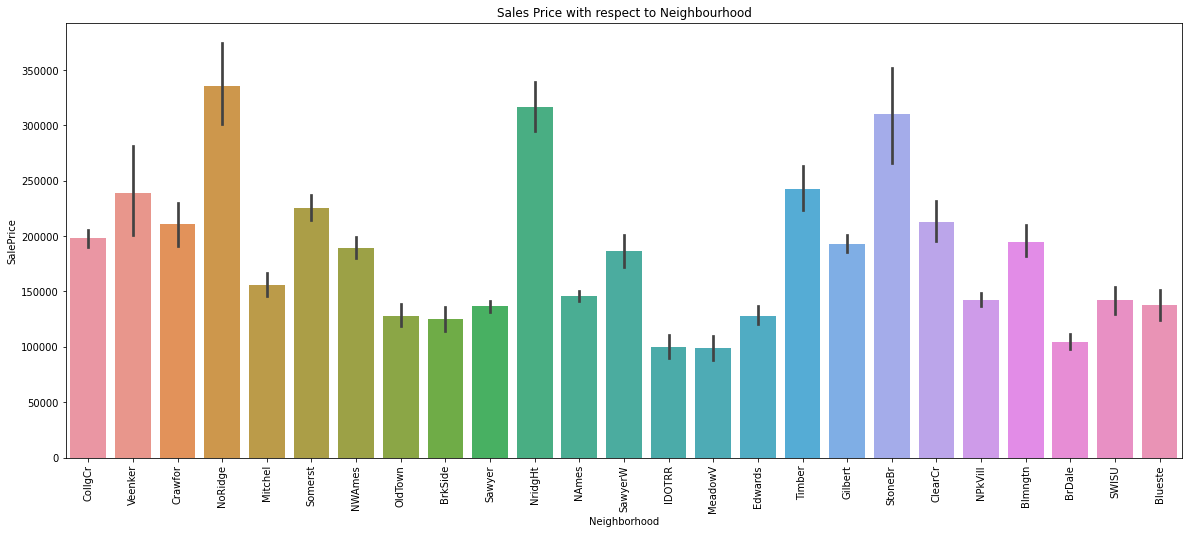

In [15]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

Overallcondition vs SalesPrice

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

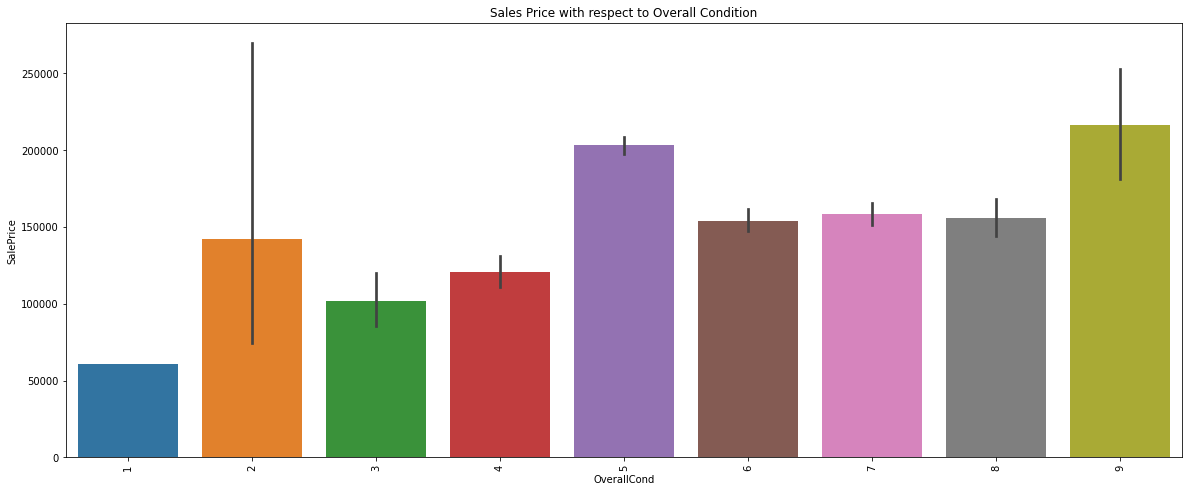

In [16]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

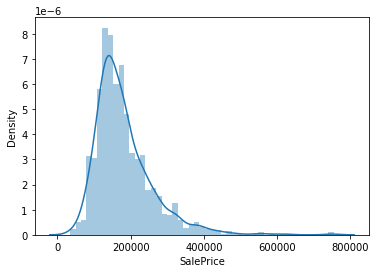

In [17]:
sns.distplot(data['SalePrice'])

In [18]:
data_raw = data.copy

Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

In [19]:
#Log Transformation
data['SalePrice']=np.log1p(data['SalePrice'])

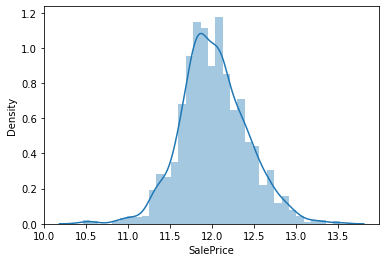

In [20]:
sns.distplot(data['SalePrice'])

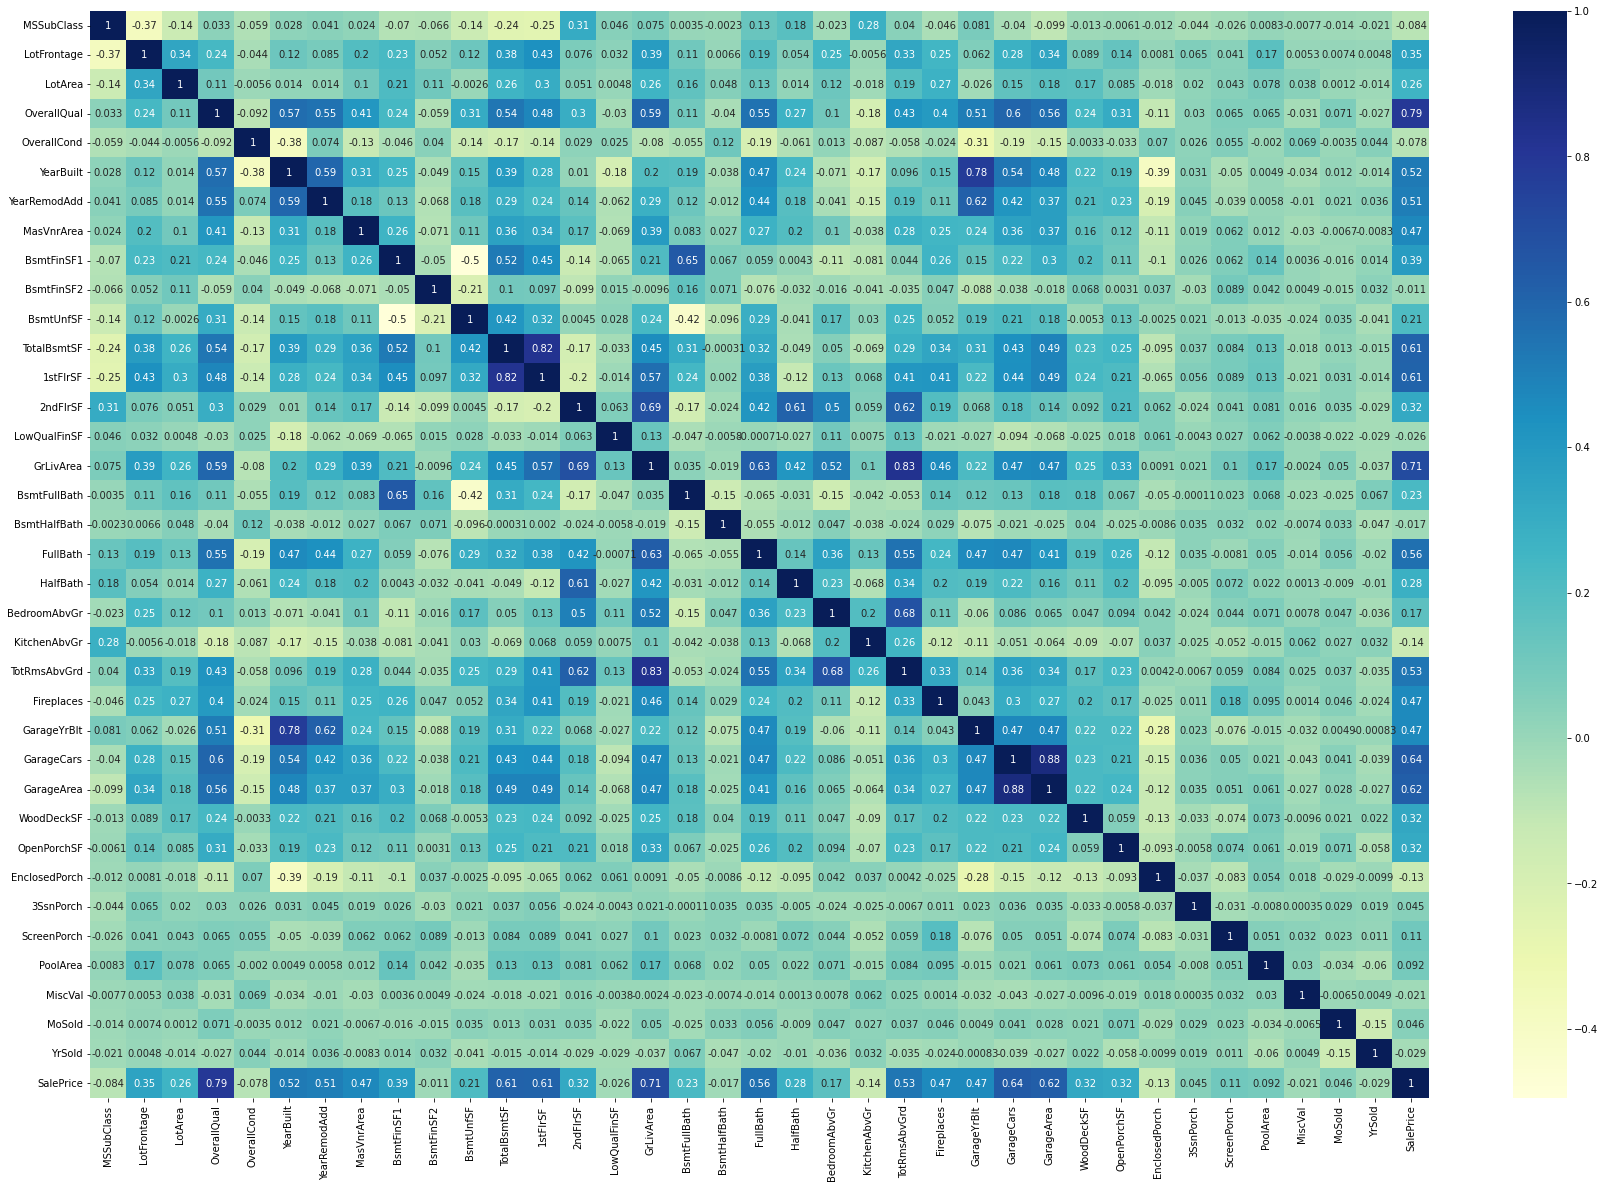

In [21]:
# correlation matrix
cor = data_numeric.corr()
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

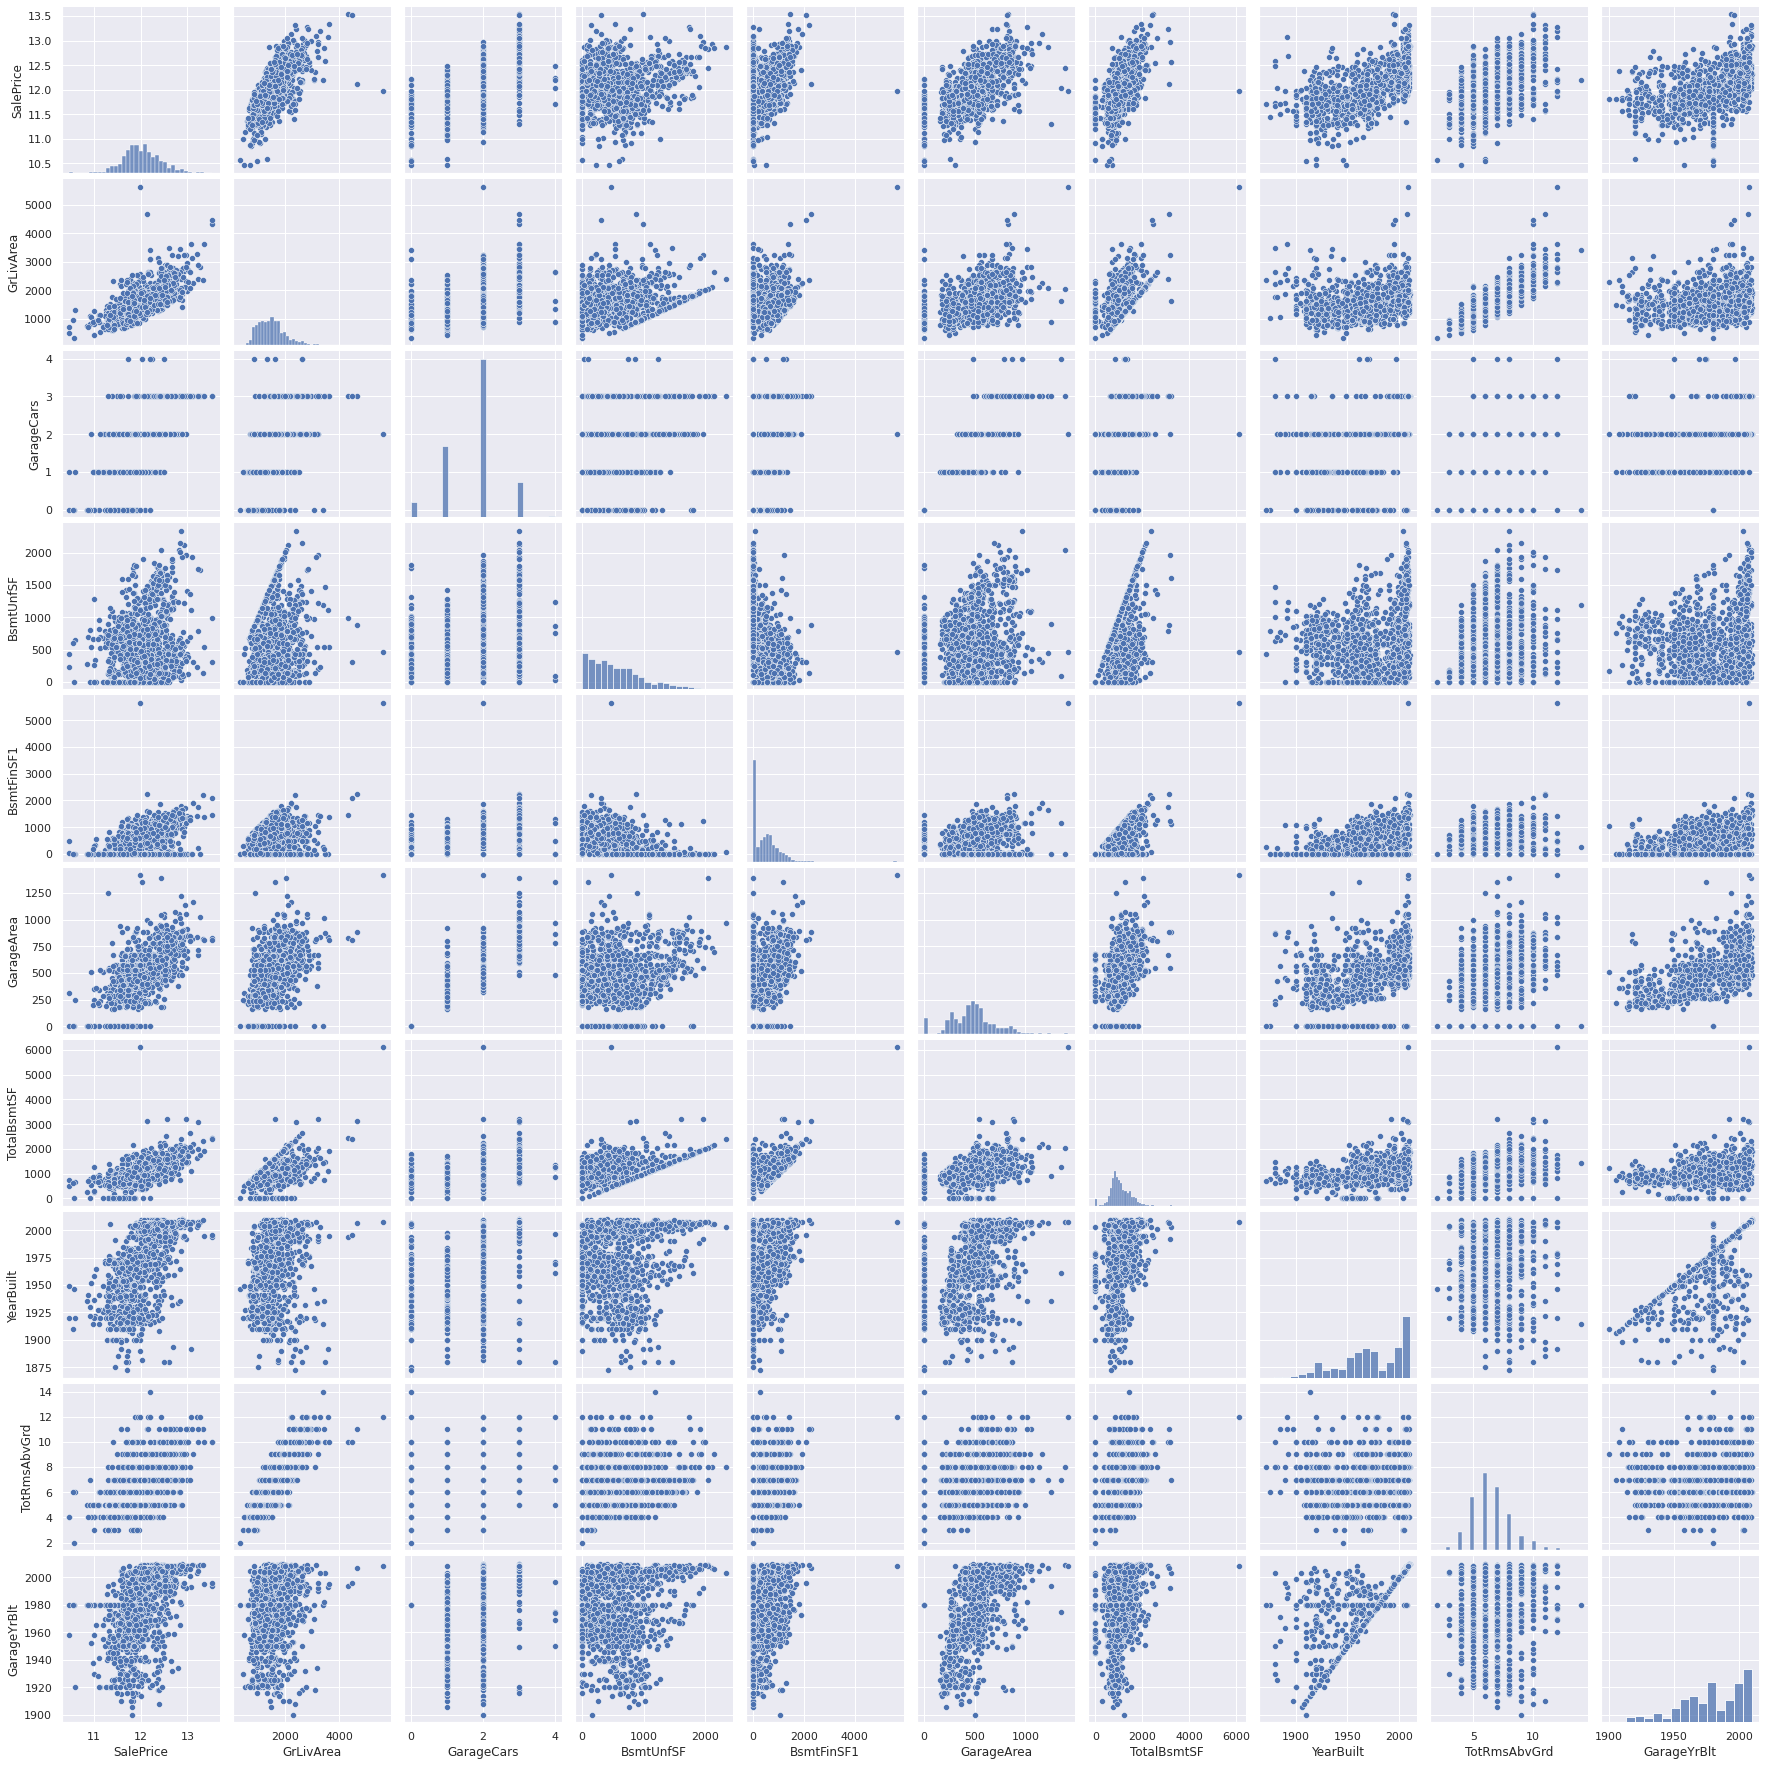

In [22]:
# pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

Drop columns that are correlated and not contributing to 'SalePrice'

In [23]:
data = data.drop(['GarageCars'], axis = 1)
data = data.drop(['BsmtUnfSF'], axis = 1)
data = data.drop(['TotRmsAbvGrd'], axis = 1)
data = data.drop(['GarageYrBlt'], axis = 1)    

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal,12.429220


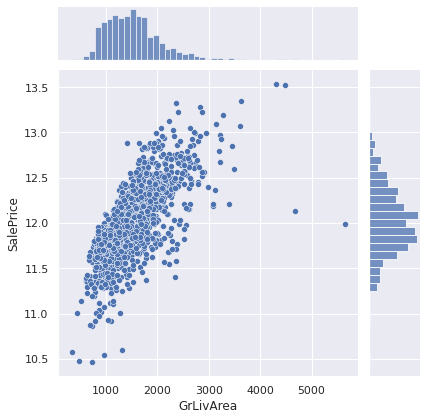

In [24]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=data)
plt.show()

In [25]:
# Removing some outliers on lower right side of 'GrLivArea'
data = remove_outliers(data,'GrLivArea')

In [26]:
data.shape

(1429, 77)

Because of  the dataset is small it isn't advisable to do remove outliers.

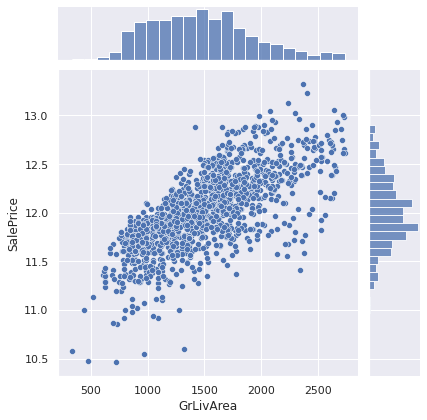

In [27]:
# Again plotting GeLivArea vs SalePrice
sns.jointplot(x = data['GrLivArea'], y = data['SalePrice'])
plt.show()

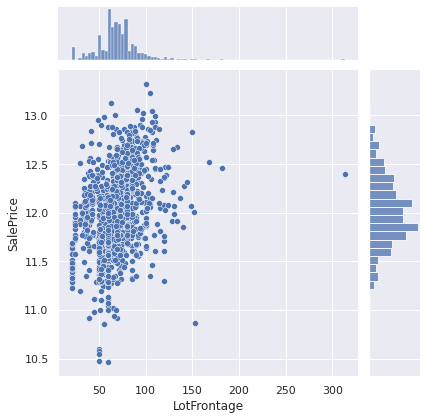

In [28]:
# Lot frontage vs SalePrice 
sns.jointplot(x = data['LotFrontage'], y = data['SalePrice'])
plt.show()

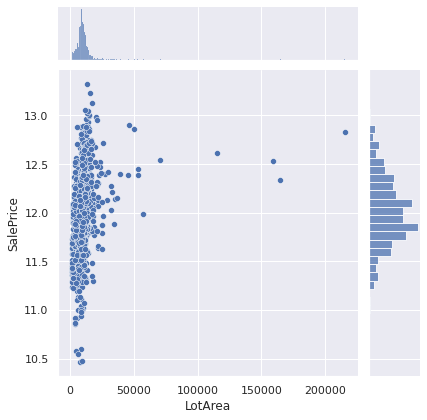

In [29]:
# LotArea vs SalePrice
sns.jointplot(x = data['LotArea'], y = data['SalePrice'])
plt.show()

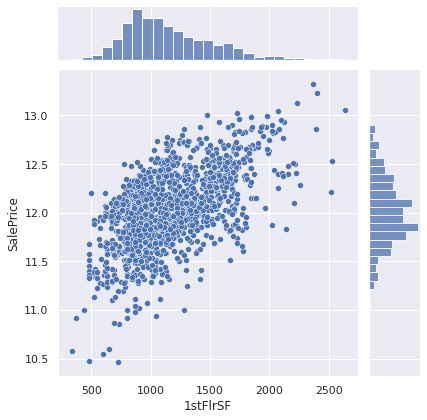

In [30]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = data['1stFlrSF'], y = data['SalePrice'])
plt.show()

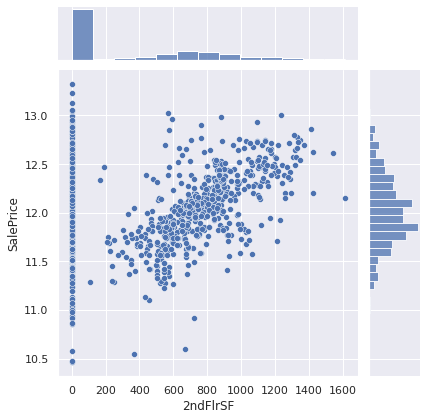

In [31]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = data['2ndFlrSF'], y = data['SalePrice'])
plt.show()

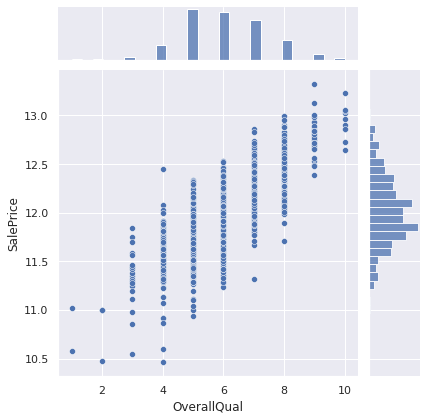

In [32]:
# OverallQual vs SalePrice
sns.jointplot(x = data['OverallQual'], y = data['SalePrice'])
plt.show()

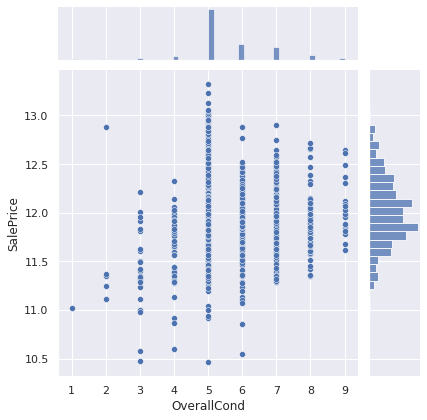

In [33]:
# OverallCond vs SalePrice
sns.jointplot(x=data['OverallCond'], y = data['SalePrice'])
plt.show()

In [34]:
# PropAge -  Property Age from yearsold - yearbuilt
data['PropAge'] = (data['YrSold'] - data['YearBuilt'])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal,12.429220,8


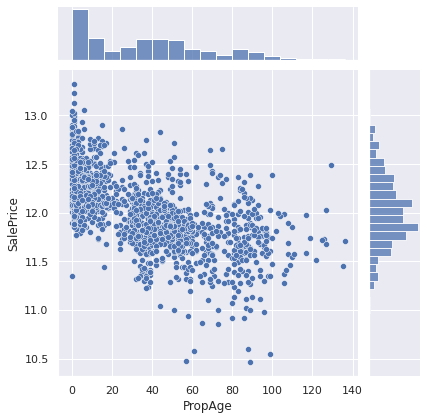

In [35]:
# PropAge vs SalePrice
sns.jointplot(x = data['PropAge'], y = data['SalePrice'])
plt.show()

In [36]:
data = data.drop(['MoSold'], axis = 1)
data = data.drop(['YrSold'], axis = 1)
data = data.drop(['YearBuilt'], axis = 1)
data = data.drop(['YearRemodAdd'], axis = 1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,WD,Normal,12.429220,8


In [37]:
data.Street.value_counts()

Pave    1423
Grvl       6
Name: Street, dtype: int64

In [38]:
data.Utilities.value_counts()

AllPub    1428
NoSeWa       1
Name: Utilities, dtype: int64

In [39]:
# We can also drop columns that show very low variance and thus not required for predictions
data = data.drop(['Street'], axis = 1)
data = data.drop(['Utilities'], axis = 1)

In [40]:
 #dropping the columns with high null values 
data = data.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)


In [41]:
data.shape

(1429, 63)

Data Preparation

In [42]:
# Drop 'Id' from Dataframe
data = data.drop(['Id'], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,0,none,Attchd,RFn,548,TA,Y,0,61,0,0,0,0,none,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,1,TA,Attchd,RFn,460,TA,Y,298,0,0,0,0,0,none,WD,Normal,12.109016,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,1,TA,Attchd,RFn,608,TA,Y,0,42,0,0,0,0,none,WD,Normal,12.317171,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,1,Gd,Detchd,Unf,642,TA,Y,0,35,272,0,0,0,none,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,1,TA,Attchd,RFn,836,TA,Y,192,84,0,0,0,0,none,WD,Normal,12.429220,8


In [43]:
#type of each feature in data: int, float, object
types = data.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [44]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      26
float64     3
Name: 0, dtype: int64

In [45]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


In [46]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


Creating Dummy columns to convert categorical into numerical

In [47]:
data = pd.get_dummies(data, drop_first=True )
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,12.247699,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,12.109016,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,12.317171,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,11.849405,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,12.429220,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [48]:
X = data.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [49]:
# Putting response variable to y
y = data['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [50]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [51]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
cl1=X_train.columns
cl2=X_test.columns
X_train[cl1]=sc_x.fit_transform(X_train)
X_test[cl2]=sc_x.fit_transform(X_test)


In [52]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
11,0.085645,0.746261,0.154684,2.241710,-0.513939,1.145212,1.323938,-0.300737,0.345478,0.113320,1.995226,-0.111211,1.923409,1.131973,-0.250936,2.754667,-0.727119,1.478865,-0.222797,2.231812,1.267298,0.485675,-0.351334,-0.378185,-0.115383,-0.268919,-0.054574,-1.209026,-0.206768,-0.095298,0.510915,-0.416784,-0.175863,-0.077693,-1.318987,-0.196014,-0.156813,0.347960,-0.261488,-0.187608,-0.054855,0.614337,-0.224544,-0.095298,-0.044766,-0.105463,-0.209383,-0.127515,-0.329617,-0.209383,...,-0.175863,-0.190445,-0.431555,-0.031639,-0.681270,0.265827,-0.142857,-0.054855,-0.031639,0.300853,-0.163383,-0.818199,-1.026347,-0.160128,1.674002,-0.105463,-0.495308,-0.988071,-1.189731,-0.114766,3.993639,-0.08396,-0.618972,-0.238919,-0.635999,-0.865015,-0.238919,-0.201452,-0.095298,-0.044766,0.344337,-0.238919,-0.160128,0.316402,-0.031639,-0.196014,0.204124,-0.054855,-0.044766,-0.089803,-0.063372,-0.044766,3.438097,-0.044766,-2.564324,-0.054855,-0.095298,-0.114766,-2.209605,3.391165
1070,-0.869945,0.130905,-0.020017,-0.764271,-0.513939,0.152993,0.360916,-0.300737,0.030191,-0.267693,-0.769750,-0.111211,-0.932170,1.131973,-0.250936,-0.990631,-0.727119,0.212713,-0.222797,-0.918240,-0.857140,-0.758474,-0.368801,-0.378185,-0.115383,3.351363,-0.054574,0.445587,-0.206768,-0.095298,0.510915,-0.416784,-0.175863,-0.077693,0.758158,-0.196014,-0.156813,0.347960,-0.261488,-0.187608,-0.054855,0.614337,-0.224544,-0.095298,-0.044766,-0.105463,-0.209383,-0.127515,-0.329617,-0.209383,...,-0.175863,-0.190445,-0.431555,-0.031639,1.467847,0.265827,-0.142857,-0.054855,-0.031639,0.300853,-0.163383,-0.818199,0.974329,-0.160128,-0.597371,-0.105463,-0.495308,1.012073,0.840526,-0.114766,-0.250398,-0.08396,-0.618972,-0.238919,-0.635999,1.156049,-0.238919,-0.201452,-0.095298,-0.044766,0.344337,-0.238919,-0.160128,0.316402,-0.031639,-0.196014,0.204124,-0.054855,-0.044766,-0.089803,-0.063372,-0.044766,-0.290859,-0.044766,0.389966,-0.054855,-0.095298,-0.114766,0.452570,-0.294884
513,-0.869945,0.083570,-0.115156,-0.012775,-0.513939,-0.564274,-0.223442,-0.300737,0.119563,-0.176705,-0.769750,-0.111211,-0.860557,-0.816345,-0.250936,-0.990631,1.275964,0.212713,-0.222797,-0.918240,0.077613,0.257158,-0.718144,2.265177,-0.115383,-0.268919,-0.054574,-0.447904,-0.206768,-0.095298,0.510915,-0.416784,-0.175863,-0.077693,0.758158,-0.196014,-0.156813,-2.873893,-0.261488,-0.187608,-0.054855,-1.627770,-0.224544,-0.095298,-0.044766,-0.105463,-0.209383,-0.127515,-0.329617,-0.209383,...,-0.175863,-0.190445,-0.431555,-0.031639,1.467847,0.265827,-0.142857,-0.054855

Model Building and Evaluation

In [53]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
461,0.282163,-0.495702,-0.339155,0.620334,3.325664,-0.606456,-0.211663,0.997135,-1.205047,-1.556925,0.506037,-0.09698,-0.813247,1.073876,-0.215271,-1.099305,-0.803081,0.172438,-0.185172,-0.988037,0.530538,1.165362,-0.747921,-0.328244,-0.127886,-0.27671,0.0,1.326790,-0.243432,-0.119098,0.540526,-0.426401,-0.137849,-0.083918,0.740767,-0.154487,-0.169638,0.293387,-0.254,-0.176777,-0.048337,0.623177,-0.183671,-0.097014,0.0,-0.108593,-0.196827,-0.162221,-0.367315,-0.128793,...,-0.137849,-0.183671,-0.482451,0.0,-0.572864,0.269258,-0.128793,0.0,0.0,0.329435,-0.169638,1.234313,-1.016452,-0.137849,-0.562095,-0.146385,-0.569275,1.095445,-1.303117,-0.097014,-0.221133,-0.068439,1.745614,-0.248759,1.524986,-0.806226,-0.248759,-0.137849,-0.083918,-0.048337,0.307226,-0.248759,-0.108593,0.264245,-0.048337,-0.162221,0.169638,-0.048337,0.0,-0.048337,-0.048337,-0.083918,-0.307226,-0.048337,0.375443,-0.048337,-0.068439,-0.128793,0.478776,-0.311748
335,3.002345,0.729276,17.009026,-0.825989,0.435637,-0.606456,1.881258,0.620602,1.075768,1.258064,-0.435654,-0.09698,0.616745,2.969732,-0.215271,0.802316,-0.803081,0.172438,-0.185172,2.151725,0.299231,4.227488,-0.747921,-0.328244,-0.127886,-0.27671,0.0,0.303675,-0.243432,-0.119098,0.540526,-0.426401,-0.137849,-0.083918,-1.349951,6.473021,-0.169638,-3.408467,-0.254,-0.176777,-0.048337,-1.604681,-0.183671,10.307764,0.0,-0.108593,-0.196827,-0.162221,-0.367315,-0.128793,...,-0.137849,-0.183671,-0.482451,0.0,-0.572864,0.269258,-0.128793,0.0,0.0,0.329435,-0.169638,-0.810167,0.983814,-0.137849,1.779058,-0.146385,-0.569275,-0.912871,0.767391,-0.097014,-0.221133,-0.068439,-0.572864,-0.248759,-0.655744,-0.806226,-0.248759,-0.137849,-0.083918,-0.048337,0.307226,-0.248759,-0.108593,0.264245,-0.048337,6.164414,-5.894913,-0.048337,0.0,-0.048337,-0.048337,-0.083918,-0.307226,-0.048337,0.375443,-0.048337,-0.068439,-0.128793,0.478776,-0.311748
200,-0.851246,0.484280,-0.190859,-1.549150,-0.527705,-0.606456,-1.026482,-0.257974,0.157612,-0.084718,-0.835813,-0.09698,-0.843999,-0.821980,-0.215271,0.802316,-0.803081,-1.081391,-0.185172,-0.988037,-0.138775,0.248203,0.135073,-0.328244,-0.127886,-0.27671,0.0,-0.924063,-0.243432,-0.119098,-1.850049,2.345208,-0.137849,-0.083918,0.740767,-0.154487,-0.169638,0.293387,-0.254,-0.176777,-0.048337,-1.604681,-0.183671,-0.097014,0.0,-0.108593,-0.196827,-0.162221,-0.367315,-0.128793,...,-0.137849,-0.183671,-0.482451,0.0,-0.572864,0.269258,-0.128793,0.0,0.0,0.329435,-0.169638,-0.810167,0.983814,-0.137849,-0.562095,-0.146385,-0.569275,1.095445,0.767391,-0.097

In [54]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [55]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, n_features_to_select=100, step=1)
rfe = rfe.fit(X_train, y_train)

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 70),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 47),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 102),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 91),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 90),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 108),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', False, 27),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 101),
 ('LotShape_IR3', False, 56),
 ('LotShape_Reg', False, 100),
 ('LandContour_HLS', False, 85),
 ('LandContour_Low', F

In [57]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr',
       'GarageArea', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea',
       'PropAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_Inside', 'Neighborhood_BrDale', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Condition1_Norm', 'Condition1_RRAe', 'Condition1_RRAn',
       'BldgType_2fmCon', 'BldgType_Twnhs', 'HouseStyle_2.5Fin',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exter

In [58]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [59]:
X_train_rfe = pd.DataFrame(X_train[col])

In [60]:
X_train_rfe.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,GarageArea,WoodDeckSF,EnclosedPorch,ScreenPorch,PoolArea,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Inside,Neighborhood_BrDale,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Norm,Condition1_RRAe,Condition1_RRAn,BldgType_2fmCon,BldgType_Twnhs,HouseStyle_2.5Fin,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_Other,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,BsmtQual_none,BsmtCond_none,BsmtExposure_Gd,BsmtFinType1_none,BsmtFinType2_none,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_Po,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_none,GarageQual_Fa,GarageQual_Po,GarageQual_TA,GarageQual_none,SaleType_CWD,SaleType_ConLD,SaleType_New,SaleCondition_Normal,SaleCondition_Partial
11,0.085645,0.746261,0.154684,2.241710,-0.513939,1.323938,0.345478,0.113320,1.995226,-0.111211,1.923409,1.131973,2.754667,-0.727119,-0.222797,1.267298,0.485675,-0.378185,-0.268919,-0.054574,-1.209026,-0.206768,-0.095298,0.510915,-0.416784,0.614337,-0.105463,-0.329617,-0.209383,-0.274352,-0.160128,-0.105463,-0.211972,-0.433184,-0.219586,-0.292876,-0.123404,-0.243561,-0.139169,-0.163383,0.386556,-0.105463,-0.139169,-0.135388,-0.178862,-0.044766,-1.987585,2.141633,0.0,-0.044766,-0.187608,-0.031639,-0.201452,-0.423374,-0.272239,-0.716142,-0.41513,-0.031639,-0.204124,0.0,-0.708168,-0.398433,-0.645314,-1.253273,3.302236,-0.14646,-0.329617,0.0,0.369274,-0.879232,1.146654,-0.070888,-0.172818,-0.172818,-0.300853,-0.172818,-0.175863,-0.681270,0.265827,-0.163383,-0.818199,-1.026347,1.674002,-0.105463,-1.189731,-0.114766,3.993639,-0.08396,-0.618972,-0.238919,-0.238919,-0.201452,-0.044766,0.344337,-0.238919,-0.054855,-0.089803,3.438097,-2.209605,3.391165
1070,-0.869945,0.130905,-0.020017,-0.764271,-0.513939,0.360916,0.030191,-0.267693,-0.769750,-0.111211,-0.932170,1.131973,-0.990631,-0.727119,-0.222797,-0.857140,-0.758474,-0.378185,3.351363,-0.054574,0.445587,-0.206768,-0.095298,0.510915,-0.416784,0.614337,-0.105463,-0.329617,-0.209383,-0.274352,-0.160128,-0.105463,-0.211972,2.308487,-0.219586,-0.292876,-0.123404,-0.243561,-0.139169,-0.163383,0.386556,-0.105463,-0.139169,-0.135388,-0.178862,-0.044766,-1.987585,2.141633,0.0,-0.044766,-0.187608,-0.031639,-0.201452,-0.423374,-0.272239,-0.716142,-0.41513,-0.031639,-0.204124,0.0,-0.708168,-0.398433,1.549632,-1.253273,-0.302825,-0.14646,-0.329617,0.0,0.369274,1.137356,-0.872103,-0.070888,-0.172818,-0.172818,-0.300853,-0.172818,-0.175863,1.467847,0.265827,-0.163383,-0.818199,0.974329,-0.597371,-0.105463,0.840526,-0.114766,-0.250398,-0.08396,-0.618972,-0.238919,-0.238919,-0.201452,-0.044766,0.344337,-0.238919,-0.054855,-0.089803,-0.290859,0.452570,-0.294884
513,-0.869945,0.083570,-0.115156,-0.012775,-0.513939,-0.223442,0.119563,-0.176705,-0.769750,-0.111211,-0.860557,-0.816345,-0.990631,1.275964,-0.222797,0.077613,0.257158,2.265177,-0.268919,-0.054574,-0.447904,-0.206768,-0.095298,0.510915,-0.416784,-1.627770,-0.105463,-0.329617,-0.209383,-0.274352,-0.160128,-0.105463,4.717607,-0.433184,-0.219586,-0.292876,-0.123404,-0.243561,-0.139169,-0.163383,0.386556,-0.105463,-0.139169,-0.135388,-0.178862,-0.044766,0.503123,-0.466933,0.0,-0.044766,-0.

In [61]:
X_train_rfe.shape

(1000, 100)

In [62]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9397594255178721

In [63]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-2.476940238980129e+18

Since the Test R2 is too low, we will check for some alternate methods of Regression

In [64]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 70),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 47),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 102),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 91),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 90),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 108),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', False, 27),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 101),
 ('LotShape_IR3', False, 56),
 ('LotShape_Reg', False, 100),
 ('LandContour_HLS', False, 85),
 ('LandContour_Low', F

In [65]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr',
       'GarageArea', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea',
       'PropAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_Inside', 'Neighborhood_BrDale', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Condition1_Norm', 'Condition1_RRAe', 'Condition1_RRAn',
       'BldgType_2fmCon', 'BldgType_Twnhs', 'HouseStyle_2.5Fin',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exter

In [66]:
X_test_rfe = X_test[col1]

In [67]:
X_test_rfe.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,GarageArea,WoodDeckSF,EnclosedPorch,ScreenPorch,PoolArea,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Inside,Neighborhood_BrDale,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Norm,Condition1_RRAe,Condition1_RRAn,BldgType_2fmCon,BldgType_Twnhs,HouseStyle_2.5Fin,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_Other,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,BsmtQual_none,BsmtCond_none,BsmtExposure_Gd,BsmtFinType1_none,BsmtFinType2_none,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_Po,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_none,GarageQual_Fa,GarageQual_Po,GarageQual_TA,GarageQual_none,SaleType_CWD,SaleType_ConLD,SaleType_New,SaleCondition_Normal,SaleCondition_Partial
461,0.282163,-0.495702,-0.339155,0.620334,3.325664,-0.211663,-1.205047,-1.556925,0.506037,-0.09698,-0.813247,1.073876,-1.099305,-0.803081,-0.185172,0.530538,1.165362,-0.328244,-0.27671,0.0,1.326790,-0.243432,-0.119098,0.540526,-0.426401,0.623177,-0.108593,-0.367315,-0.128793,-0.264245,-0.169638,-0.119098,-0.119098,-0.422577,-0.248759,-0.274204,7.254309,-0.274204,-0.083918,-0.162221,-2.456173,0.0,-0.119098,-0.169638,-0.169638,-0.068439,0.551318,-0.518875,-0.048337,0.0,-0.176777,0.0,-0.209274,-0.426401,-0.307226,-0.806226,2.663520,0.0,-0.203131,-0.048337,-0.782804,2.635231,-0.692322,0.887412,-0.311748,-0.128793,3.076266,-0.048337,-2.753180,-0.895835,1.09031,-0.048337,-0.137849,-0.137849,-0.333765,-0.137849,-0.137849,-0.572864,0.269258,-0.169638,1.234313,-1.016452,-0.562095,-0.146385,-1.303117,-0.097014,-0.221133,-0.068439,1.745614,-0.248759,-0.248759,-0.137849,-0.048337,0.307226,-0.248759,-0.048337,-0.048337,-0.307226,0.478776,-0.311748
335,3.002345,0.729276,17.009026,-0.825989,0.435637,1.881258,1.075768,1.258064,-0.435654,-0.09698,0.616745,2.969732,0.802316,-0.803081,-0.185172,0.299231,4.227488,-0.328244,-0.27671,0.0,0.303675,-0.243432,-0.119098,0.540526,-0.426401,-1.604681,-0.108593,-0.367315,-0.128793,-0.264245,-0.169638,-0.119098,-0.119098,-0.422577,-0.248759,-0.274204,-0.137849,-0.274204,-0.083918,6.164414,0.407137,0.0,-0.119098,5.894913,-0.169638,-0.068439,0.551318,-0.518875,-0.048337,0.0,-0.176777,0.0,-0.209274,-0.426401,3.254934,-0.806226,-0.375443,0.0,-0.203131,-0.048337,-0.782804,-0.379473,-0.692322,0.887412,-0.311748,-0.128793,-0.325069,-0.048337,0.363216,1.116277,-0.91717,-0.048337,-0.137849,-0.137849,2.996122,-0.137849,-0.137849,-0.572864,0.269258,-0.169638,-0.810167,0.983814,1.779058,-0.146385,0.767391,-0.097014,-0.221133,-0.068439,-0.572864,-0.248759,-0.248759,-0.137849,-0.048337,0.307226,-0.248759,-0.048337,-0.048337,-0.307226,0.478776,-0.311748
200,-0.851246,0.484280,-0.190859,-1.549150,-0.527705,-1.026482,0.157612,-0.084718,-0.835813,-0.09698,-0.843999,-0.821980,0.802316,-0.803081,-0.185172,-0.138775,0.248203,-0.328244,-0.27671,0.0,-0.924063,-0.243432,-0.119098,-1.850049,2.345208,-1.604681,-0.108593,-0.367315,-0.128793,3.784366,-0.169638,-0.119098,-0.119098,-0.422577,-0.248759,-0.274204,-0.137849,-0.274204,-0.083918,-0.162221,0.407137,0.0,-0.119098,-0.169638,-0.169638,-0.068439,0.551318,-0.518875,-0.048337,0.0,-0.176777,0.0,-0.209274,-0.426401,-0.307226

Lasso and Ridge Regression
Let's now try predicting house prices and perform lasso and ridge regression.

In [68]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1000, 210)
y_train (1000,)


In [69]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.164368,0.018381,0.007609,0.001818,0.0001,{'alpha': 0.0001},-0.097002,-0.080074,-0.091910,-0.090254,-0.080156,-0.087879,0.006718,2,-0.064129,-0.066873,-0.063232,-0.064928,-0.065871,-0.065007,0.001277
1,0.036457,0.005903,0.006533,0.002091,0.001,{'alpha': 0.001},-0.088209,-0.080089,-0.086485,-0.083276,-0.076091,-0.082830,0.004369,1,-0.066395,-0.068243,-0.065360,-0.067640,-0.068583,-0.067244,0.001201
2,0.017493,0.004776,0.007275,0.003833,0.01,{'alpha': 0.01},-0.087316,-0.090302,-0.092190,-0.086830,-0.084277,-0.088183,0.002771,3,-0.083292,-0.082376,-0.082013,-0.082784,-0.082984,-0.082690,0.000451
3,0.016156,0.006932,0.007685,0.002712,0.05,{'alpha': 0.05},-0.127127,-0.113033,-0.131078,-0.110047,-0.111820,-0.118621,0.008701,4,-0.117639,-0.116363,-0.115820,-0.116744,-0.117292,-0.116772,0.000647
4,0.014193,0.005532,0.006548,0.002508,0.1,{'alpha': 0.1},-0.172055,-0.148653,-0.168033,-0.143888,-0.146182,-0.155762,0.011827,5,-0.155429,-0.155643,-0.153254,-0.153682,-0.156270,-0.154856,0.001174


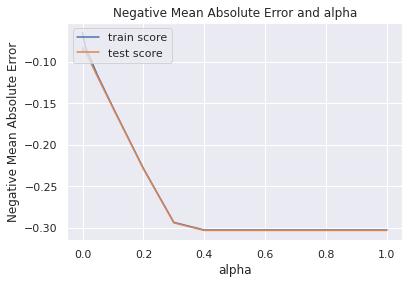

In [71]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter,
but we will choose a low value of alpha to balance the trade-off between Bias-Variance
and to get the coefficients of smallest of features.

In [72]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00000000e+00,  1.02547527e-02,  1.52926557e-02,  9.95479692e-02,
        4.00450088e-02,  0.00000000e+00,  3.66533462e-02,  0.00000000e+00,
        3.72374007e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.20585937e-01,  8.22424021e-03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -4.06331813e-03,  4.31439499e-03,
        2.88974692e-02,  8.14325097e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.71676226e-03,  0.00000000e+00, -6.56342239e-02,
        0.00000000e+00, -0.00000000e+00,  6.91353004e-03, -1.06630199e-02,
        0.00000000e+00, -0.00000000e+00, -2.79792729e-03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -6.72046528e-04,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.64351700e-04,
        0.00000000e+00,  1.43057577e-02, -0.00000000e+00, -0.00000000e+00,
       -1.00278863e-02, -

In [73]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.999),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.01),
 ('LotArea', 0.015),
 ('OverallQual', 0.1),
 ('OverallCond', 0.04),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.037),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.037),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.121),
 ('BsmtFullBath', 0.008),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.004),
 ('Fireplaces', 0.004),
 ('GarageArea', 0.029),
 ('WoodDeckSF', 0.008),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.004),
 ('PoolArea', 0.0),
 ('PropAge', -0.066),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.007),
 ('MSZoning_RM', -0.011),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.003),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', -

In [74]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.906214722826352
0.901458605754343


In [75]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11871612755211676


In [76]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [77]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,11.999
1,MSSubClass,-0.000
2,LotFrontage,0.010
3,LotArea,0.015
4,OverallQual,0.100


In [78]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,11.999
13,GrLivArea,0.121
4,OverallQual,0.100
5,OverallCond,0.040
7,BsmtFinSF1,0.037
...,...,...
53,Neighborhood_IDOTRR,-0.010
178,FireplaceQu_none,-0.011
32,MSZoning_RM,-0.011
173,KitchenQual_TA,-0.014


In [79]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,11.999
13,GrLivArea,0.121
4,OverallQual,0.100
5,OverallCond,0.040
7,BsmtFinSF1,0.037
9,TotalBsmtSF,0.037
21,GarageArea,0.029
210,SaleCondition_Partial,0.019
3,LotArea,0.015
50,Neighborhood_Crawfor,0.014


In [80]:
pred.shape

(43, 2)

In [81]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', 'GarageArea', 'SaleCondition_Partial', 'LotArea', 'Neighborhood_Crawfor', 'Foundation_PConc', 'CentralAir_Y', 'LotFrontage', 'WoodDeckSF', 'BsmtFullBath', 'Condition1_Norm', 'MSZoning_RL', 'BsmtExposure_Gd', 'SaleCondition_Normal', 'FireplaceQu_Gd', 'Fireplaces', 'GarageType_Attchd', 'ScreenPorch', 'Exterior1st_BrkFace', 'MasVnrType_Stone', 'Neighborhood_StoneBr', 'Neighborhood_OldTown', 'Neighborhood_MeadowV', 'ExterQual_TA', 'BsmtQual_TA', 'LotConfig_Inside', 'LotShape_Reg', 'BldgType_Twnhs', 'KitchenAbvGr', 'ExterCond_Fa', 'Exterior1st_BrkComm', 'HeatingQC_TA', 'GarageType_none', 'Neighborhood_IDOTRR', 'FireplaceQu_none', 'MSZoning_RM', 'KitchenQual_TA', 'PropAge']


Ridge Regression

In [82]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013382,0.001465,0.005485,0.000070,0.0001,{'alpha': 0.0001},-0.098644,-0.080579,-0.093412,-0.093391,-0.082226,-0.089650,0.007021,26,-0.063890,-0.066811,-0.062901,-0.064702,-0.065820,-0.064825,0.001380
1,0.018210,0.005421,0.009365,0.003409,0.001,{'alpha': 0.001},-0.098644,-0.080579,-0.093411,-0.093388,-0.082224,-0.089649,0.007020,25,-0.063890,-0.066811,-0.062900,-0.064702,-0.065820,-0.064825,0.001381
2,0.016439,0.006321,0.007458,0.002509,0.01,{'alpha': 0.01},-0.098640,-0.080576,-0.093400,-0.093366,-0.082208,-0.089638,0.007020,24,-0.063889,-0.066810,-0.062899,-0.064703,-0.065821,-0.064824,0.001381
3,0.024384,0.001446,0.010917,0.004170,0.05,{'alpha': 0.05},-0.098623,-0.080567,-0.093356,-0.093267,-0.082140,-0.089591,0.007018,23,-0.063886,-0.066808,-0.062896,-0.064705,-0.065822,-0.064824,0.001382
4,0.012666,0.002795,0.007592,0.004679,0.1,{'alpha': 0.1},-0.098602,-0.080556,-0.093304,-0.093148,-0.082059,-0.089534,0.007014,22,-0.063883,-0.066805,-0.062893,-0.064708,-0.065825,-0.064823,0.001382


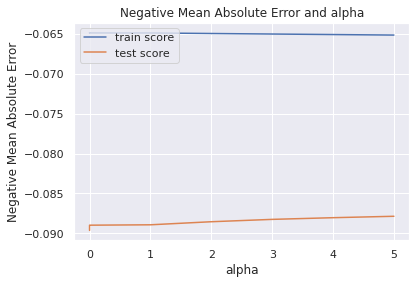

In [84]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [85]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.35281013e-02,  7.90711176e-03,  2.93489700e-02,  5.94571601e-02,
        4.90884251e-02, -2.76493821e-03,  3.11905251e-02,  6.16099894e-03,
        3.92788843e-02,  3.74266910e-02,  5.07526221e-02,  9.07729505e-03,
        7.71836929e-02,  1.05790536e-02, -5.77613555e-04,  7.42108330e-03,
        1.20938250e-02,  1.38753675e-03, -2.71330122e-03,  2.19089629e-03,
        2.20818411e-02,  1.39094883e-02,  3.28937528e-05,  1.21573098e-02,
        5.24288271e-03,  1.46307208e-02,  8.34170324e-03, -6.50342608e-02,
        6.63723084e-02,  2.68204298e-02,  1.10281070e-01,  8.77921672e-02,
        6.30309696e-04, -2.38890147e-03,  4.85695204e-04,  1.68520386e-03,
       -3.90135665e-03,  6.56910881e-04,  3.63949759e-03, -5.40835364e-03,
       -5.80174830e-03, -1.14631292e-02,  3.93509770e-03, -8.06169057e-03,
       -2.32460431e-03, -5.22366135e-03, -4.54748854e-03,  1.82196777e-03,
       -7.24985910e-03,  1.98850157e-02, -2.29572006e-02, -5.01460213e-03,
       -1.34363882e-02, -

In [86]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.999),
 ('MSSubClass', -0.014),
 ('LotFrontage', 0.008),
 ('LotArea', 0.029),
 ('OverallQual', 0.059),
 ('OverallCond', 0.049),
 ('MasVnrArea', -0.003),
 ('BsmtFinSF1', 0.031),
 ('BsmtFinSF2', 0.006),
 ('TotalBsmtSF', 0.039),
 ('1stFlrSF', 0.037),
 ('2ndFlrSF', 0.051),
 ('LowQualFinSF', 0.009),
 ('GrLivArea', 0.077),
 ('BsmtFullBath', 0.011),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.007),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', 0.001),
 ('KitchenAbvGr', -0.003),
 ('Fireplaces', 0.002),
 ('GarageArea', 0.022),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.015),
 ('PoolArea', 0.008),
 ('PropAge', -0.065),
 ('MSZoning_FV', 0.066),
 ('MSZoning_RH', 0.027),
 ('MSZoning_RL', 0.11),
 ('MSZoning_RM', 0.088),
 ('LotShape_IR2', 0.001),
 ('LotShape_IR3', -0.002),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 0.002),
 ('LandContour_Low', -0.004),
 ('LandContour_Lvl', 0.001),
 ('LotConfig_CulDSac', 0.004),
 ('Lot

In [87]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9396251134462037
0.9008566200425261


In [88]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11907819163859389


In [89]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [90]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.999
31,MSZoning_RL,0.110
32,MSZoning_RM,0.088
13,GrLivArea,0.077
29,MSZoning_FV,0.066
4,OverallQual,0.059
11,2ndFlrSF,0.051
5,OverallCond,0.049
179,GarageType_Attchd,0.045
210,SaleCondition_Partial,0.044


In [91]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,11.999
31,MSZoning_RL,0.110
32,MSZoning_RM,0.088
13,GrLivArea,0.077
29,MSZoning_FV,0.066
...,...,...
88,RoofStyle_Gable,-0.028
90,RoofStyle_Hip,-0.030
172,KitchenQual_Gd,-0.040
173,KitchenQual_TA,-0.048


In [92]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,11.999
31,MSZoning_RL,0.110
32,MSZoning_RM,0.088
13,GrLivArea,0.077
29,MSZoning_FV,0.066
...,...,...
88,RoofStyle_Gable,-0.028
90,RoofStyle_Hip,-0.030
172,KitchenQual_Gd,-0.040
173,KitchenQual_TA,-0.048


In [93]:
predRFE.shape

(197, 2)

Both models have similar r2 and rme value.Its better to go for lasso regression because of its less features 
It is always advisable to use simple yet robust model.
Equation can be formulated using the features and coefficients obtained by Lasso

In [94]:
pred.shape
pred
pred["values"] = "("+pred["Coeff"].astype(str)+")"+ "*"+"("+pred["Variable"] +")"

In [98]:
terms=pred["values"]
logofSalesPrice="+".join(terms)
logofSalesPrice

'(11.999)*(constant)+(0.121)*(GrLivArea)+(0.1)*(OverallQual)+(0.04)*(OverallCond)+(0.037)*(BsmtFinSF1)+(0.037)*(TotalBsmtSF)+(0.029)*(GarageArea)+(0.019)*(SaleCondition_Partial)+(0.015)*(LotArea)+(0.014)*(Neighborhood_Crawfor)+(0.014)*(Foundation_PConc)+(0.013)*(CentralAir_Y)+(0.01)*(LotFrontage)+(0.008)*(WoodDeckSF)+(0.008)*(BsmtFullBath)+(0.008)*(Condition1_Norm)+(0.007)*(MSZoning_RL)+(0.007)*(BsmtExposure_Gd)+(0.007)*(SaleCondition_Normal)+(0.005)*(FireplaceQu_Gd)+(0.004)*(Fireplaces)+(0.004)*(GarageType_Attchd)+(0.004)*(ScreenPorch)+(0.002)*(Exterior1st_BrkFace)+(0.001)*(MasVnrType_Stone)+(0.001)*(Neighborhood_StoneBr)+(-0.001)*(Neighborhood_OldTown)+(-0.001)*(Neighborhood_MeadowV)+(-0.001)*(ExterQual_TA)+(-0.001)*(BsmtQual_TA)+(-0.001)*(LotConfig_Inside)+(-0.003)*(LotShape_Reg)+(-0.004)*(BldgType_Twnhs)+(-0.004)*(KitchenAbvGr)+(-0.004)*(ExterCond_Fa)+(-0.004)*(Exterior1st_BrkComm)+(-0.007)*(HeatingQC_TA)+(-0.009)*(GarageType_none)+(-0.01)*(Neighborhood_IDOTRR)+(-0.011)*(FireplaceQ

**INFERENCE**

Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.
The higher values of positive coeeficients suggest a high sale value.
Some of those features are:-

GrLivArea

OverallQual

OverallCond

TotalBsmtSF
	
GarageArea

The higher values of negative coeeficients suggest a decrease in sale value.
Some of those features are:-

The higher values of negative coeeficients suggest a decrease in sale value.
Some of those features are:-

PropAge

When the market value of the property is lower than the Predicted Sale Price, its the time to buy.